In [0]:
!pip install pydrive
from google.colab import drive
drive.mount('/content/gdrive')

     |████████████████████████████████| 993kB 5.0MB/s 
  Created wheel for pydrive: filename=PyDrive-1.3.1-cp36-none-any.whl size=27435 sha256=214e570b48d629e31c68f97575701d957e937384bdce8d453f37956a7c4c148d
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,precision_recall_curve,confusion_matrix,precision_score,f1_score,recall_score
from sklearn.naive_bayes import MultinomialNB
import pickle

In [0]:
root_path = 'gdrive/My Drive/your_project_folder/'  #change dir to your project folder
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keenborder","key":"ddc3b559dc1e28801443e83c5aad40c5"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [0]:
#List datasets and competitions
!kaggle datasets list   
!kaggle competitions list

In [0]:
!kaggle competitions download -c ieee-fraud-detection -p /content/gdrive/My\ Drive/kaggle/IEEE

 78% 41.0M/52.5M [00:00<00:00, 31.1MB/s]
100% 52.5M/52.5M [00:00<00:00, 63.5MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 49.2MB/s]
 91% 43.0M/47.3M [00:00<00:00, 56.4MB/s]
100% 47.3M/47.3M [00:00<00:00, 74.5MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 96.4MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 76.6MB/s]


In [0]:
import os
os.chdir('/content/gdrive/My Drive/kaggle/IEEE')  #change dir
!mkdir train  #create a directory named train/
!mkdir test  #create a directory named test/

In [0]:
!unzip -q train_transaction.csv.zip -d train/  #unzip data in train/
!unzip -q train_identity.csv.zip -d train/  #unzip data in train/
!unzip -q test_transaction.csv.zip -d test/  #unzip data in train/
!unzip -q test_identity.csv.zip -d test/  #unzip data in train/

In [0]:
!pip install pydrive
from google.colab import auth
import os
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import os
os.chdir('/content/gdrive/My Drive/kaggle/IEEE/train')
df=pd.read_csv("train_transaction.csv",engine='python',chunksize=10000)
df1=pd.read_csv("train_identity.csv",engine='python')

In [0]:
training_data=[]
from tqdm import tqdm
for idf in tqdm(df):
  mean_transcation=np.array(idf.fillna(0).iloc[:,17:].mean(axis=1))
  std_transcation=np.array(idf.fillna(0).iloc[:,17:].std(axis=1))
  max_transcation=np.array(idf.fillna(0).iloc[:,17:].max(axis=1))
  min_transcation=np.array(idf.fillna(0).iloc[:,17:].min(axis=1))
  X=pd.DataFrame(idf.iloc[:,:18])
  X["mean_values"]=mean_transcation
  X["std_values"]=mean_transcation
  X["max_values"]=max_transcation
  X["min_values"]=min_transcation
  training_data.append(np.array(X))

60it [06:18,  4.73s/it]


In [0]:
training_data=np.array(training_data)
final_trans=[]
for i in training_data:
  for a in i:
    final_trans.append(a)


In [0]:
final_trans

[array([2987000, 0, 86400, 68.5, 'W', 13926, nan, 150.0, 'discover', 142.0,
        'credit', 315.0, 87.0, 19.0, nan, nan, nan, 1.0,
        1.6059782608695652, 1.6059782608695652, 117.0, 0.0], dtype=object),
 array([2987001, 0, 86401, 29.0, 'W', 2755, 404.0, 150.0, 'mastercard',
        102.0, 'credit', 325.0, 87.0, nan, nan, 'gmail.com', nan, 1.0,
        0.16032608695652173, 0.16032608695652173, 1.0, 0.0], dtype=object),
 array([2987002, 0, 86469, 59.0, 'W', 4663, 490.0, 150.0, 'visa', 166.0,
        'debit', 330.0, 87.0, 287.0, nan, 'outlook.com', nan, 1.0,
        1.921195652173913, 1.921195652173913, 315.0, 0.0], dtype=object),
 array([2987003, 0, 86499, 50.0, 'W', 18132, 567.0, 150.0, 'mastercard',
        117.0, 'debit', 476.0, 87.0, nan, nan, 'yahoo.com', nan, 2.0,
        32.07336956521739, 32.07336956521739, 1758.0, 0.0], dtype=object),
 array([2987004, 0, 86506, 50.0, 'H', 4497, 514.0, 150.0, 'mastercard',
        102.0, 'credit', 420.0, 87.0, nan, nan, 'gmail.com', nan, 1.

In [0]:
transcation_ids=list(idf.columns.tolist()[:18])
transcation_ids.append("mean_transcation")
transcation_ids.append("std_transcation")
transcation_ids.append("max_transcation")
transcation_ids.append("min_transcation")
df_new=pd.DataFrame(final_trans,columns=transcation_ids)

In [0]:
final_df=df_new.merge(df1, left_on="TransactionID", right_on="TransactionID",how="outer")

In [0]:
final_df = final_df.fillna(final_df.mode().iloc[0])

In [0]:
final_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,mean_transcation,std_transcation,max_transcation,min_transcation,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,321.0,150.0,discover,142.0,credit,315.0,87.0,19.0,7.0,gmail.com,gmail.com,1.0,1.605978,1.605978,117.000000,0.0,-5.0,1102.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,15.0,266.0,507.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,0.0,7.0,gmail.com,gmail.com,1.0,0.160326,0.160326,1.000000,0.0,-5.0,1102.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,15.0,266.0,507.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,7.0,outlook.com,gmail.com,1.0,1.921196,1.921196,315.000000,0.0,-5.0,1102.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,15.0,266.0,507.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,0.0,7.0,yahoo.com,gmail.com,2.0,32.073370,32.073370,1758.000000,0.0,-5.0,1102.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,15.0,266.0,507.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,0.0,7.0,gmail.com,gmail.com,1.0,532.396161,532.396161,169690.796875,0.0,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,NotFound,52.0,-480.0,New,NotFound,166.0,15.0,542.0,144.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,7.0,gmail.com,gmail.com,1.0,0.209239,0.209239,1.000000,0.0,-5.0,1102.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,15.0,266.0,507.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,7.0,yahoo.com,gmail.com,1.0,0.209239,0.209239,1.000000,0.0,-5.0,1102.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,15.0,266.0,507.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,0.0,7.0,mail.com,gmail.com,1.0,0.160326,0.160326,1.000000,0.0,-5.0,1102.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,15.0,266.0,507.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,Found,Found,Windows 10,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,0.0,7.0,anonymous.com,gmail.com,1.0,532.670617,532.670617,169740.796875,0.0,-5.0,98945.0,0.0,0.0,0.0,-5.0,0.0,-100.0,0.0,0.0,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,15.0,621.0,500.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,New,NotFound,iOS 11.1.2,mob

In [0]:
import os
os.chdir('/content/gdrive/My Drive/kaggle/IEEE/train')
final_df.to_csv("final_df.csv")


In [0]:
import os
os.chdir('/content/gdrive/My Drive/kaggle/IEEE/train')
final_df=pd.read_csv("final_df.csv",index_col="TransactionID")

In [0]:
from sklearn import preprocessing
a=-1
for i in final_df.dtypes.index:
  a+=1
  if final_df.dtypes.iloc[a]=="object":
    le = preprocessing.LabelEncoder()
    final_df[i] = le.fit_transform(final_df[i])
    output = open('{} encoder.pkl'.format(i), 'wb')
    pickle.dump(le, output)
    output.close()

In [0]:
import numpy as np
X=np.array(final_df.drop(["isFraud",'Unnamed: 0'],1))
y=np.array(final_df["isFraud"])
X.shape

(590540, 60)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [0]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [0]:
!pip install xgboost
import xgboost as xgb
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

os.chdir('/content/gdrive/My Drive/kaggle/IEEE/train')

xgb_model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)





# xgb_model = xgb_model.fit(X,y)

# filehandler = open("xgb.pickle.dat","wb")
# pickle.dump(xgb_model,filehandler)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  11 out of  13 | elapsed: 53.9min remaining:  9.8min


KeyboardInterrupt: ignored

In [0]:
+!pip install catboost
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt   
from catboost import CatBoostClassifier

model = CatBoostClassifier()
parameters = {'depth'         : sp_randInt(4, 10),'learning_rate' : sp_randFloat(),'iterations'    : sp_randInt(10, 100)}
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, 
                               cv = 3, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)
# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          randm.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          randm.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
    
print("\n ========================================================")


SyntaxError: ignored

In [0]:
{'depth': 9, 'iterations': 43, 'learning_rate': 0.5612488002866639}

model = CatBoostClassifier(depth=9,iterations=43,learning_rate= 0.5612488002866639)
model.fit(X,y)
model.save_model("catboost.model")
model.best_score_

NameError: ignored

In [0]:
def Machine_learning_model(clf,X,y):
        Name=str(clf)
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)
        clf.fit(X_train,y_train)
        ##saving the dataset
        
        with open('{}.pkl'.format(Name[:20]), 'wb') as fid:
            pickle.dump(clf, fid)  
        
        y_train_scores=clf.predict_proba(X_train)[:,1]
        y_test_scores=clf.predict_proba(X_test)[:,1]
        y_pred_train=clf.predict(X_train)
        y_pred_test=clf.predict(X_test)


        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_scores)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_scores)
        ##roc curve
        fig1=plt.figure()
        ax1=fig1.add_subplot(111)
        ax1.plot(fpr_train,tpr_train)
        ax1.plot([0,1],[0,1],linestyle='dashed')
        ax1.set_title("ROC Curve--Train for {}".format(Name[:20]))
        ax1.set_xticks([],[])
        ax1.set_ylabel("True Positive Rate")
        
        fig2=plt.figure()
        ax2=fig2.add_subplot(111)
        ax2.plot([0,1],[0,1],linestyle='dashed')
        ax2.plot(fpr_train,tpr_train,color="green")
        ax2.set_title("ROC Curve--Test for {}".format(Name[:20]))
        ax2.set_xlabel("False Positive Rate")
        ax2.set_ylabel("True Positive Rate")
        
        print("The  classification accuracy(Train)  for {} is:".format(Name[:20]),clf.score(X_train,y_train))
        print("The  classification accuracy(Test)  for {} is:".format(Name[:20]),clf.score(X_test,y_test))
        print("The  precision_score(Train)  for {} is:".format(Name[:20]),precision_score(y_train,y_pred_train))
        print("The  precision_score(Test)  for {} is:".format(Name[:20]),precision_score(y_test,y_pred_test))
        print("The  recall_score(Train)  for {} is:".format(Name[:20]),recall_score(y_train,y_pred_train))
        print("The  recall_score(Test)  for {} is:".format(Name[:20]),recall_score(y_test,y_pred_test))
        print("The  f1_score(Train)  for {} is:".format(Name[:20]),f1_score(y_train,y_pred_train))
        print("The  f1_score(Test)  for {} is:".format(Name[:20]),f1_score(y_test,y_pred_test))
        ###threshold graph with accuracy and precision:
        probs=clf.predict_proba(X)[:,1]
        df=pd.DataFrame()
        df["thresholds"]=probs
        df["actual_labels"]=y
        accuracy=[]
        threshold=np.arange(0.1,1,.1).tolist()
        for i in threshold:
            df["predicted_labels"]=np.where(df["thresholds"]>=i,1,0)
            df["Correct"]=df["actual_labels"]==df["predicted_labels"]
            correct=len(df[(df["Correct"]==True)])
            accuracy.append(correct/len(df))
        precisions, recalls, thresholds = precision_recall_curve(y, probs)
        
        fig3=plt.figure()
        ax3=fig3.add_subplot(111)
        ax3.plot(thresholds, precisions[:-1], 'b--', label='precision')
        ax3.plot(threshold, accuracy, 'g--', label = 'accuracy')
        ax3.set_xlabel('Threshold')
        ax3.legend(loc='upper left')
        ax3.set_ylim([0,1])
        
        ###confusion matrix
        y_pred=clf.predict(X)
        print("OverAll Confusion Matrix for {}".format(Name[:20]))
        print(confusion_matrix(y, y_pred))
        filehandler = open("r"+Name[:20]+".pickle","wb")
        pickle.dump(clf,filehandler)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The  classification accuracy(Train)  for RandomForestClassifi is: 0.9964818367238621
The  classification accuracy(Test)  for RandomForestClassifi is: 0.9764058723618245
The  precision_score(Train)  for RandomForestClassifi is: 0.99943269308696
The  precision_score(Test)  for RandomForestClassifi is: 0.9406906906906907
The  recall_score(Train)  for RandomForestClassifi is: 0.8990304002332872
The  recall_score(Test)  for RandomForestClassifi is: 0.3607831845666571
The  f1_score(Train)  for RandomForestClassifi is: 0.946576604237028
The  f1_score(Test)  for RandomForestClassifi is: 0.5215400624349635
OverAll Confusion Matrix for RandomForestClassifi
[[569712    165]
 [  5825  14838]]


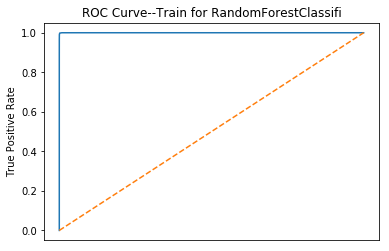

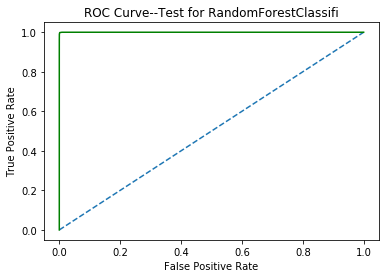

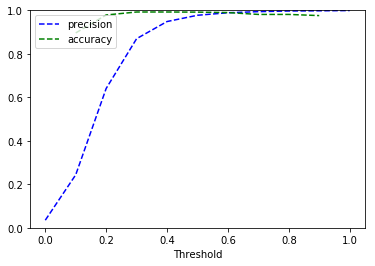

In [0]:
Machine_learning_model(RandomForestClassifier(),X,y)

The  classification accuracy(Train)  for GradientBoostingClas is: 0.971541294188712
The  classification accuracy(Test)  for GradientBoostingClas is: 0.9709460742306765
The  precision_score(Train)  for GradientBoostingClas is: 0.8230344464896134
The  precision_score(Test)  for GradientBoostingClas is: 0.8312693498452013
The  recall_score(Train)  for GradientBoostingClas is: 0.22818400524896115
The  recall_score(Test)  for GradientBoostingClas is: 0.2319320472214224
The  f1_score(Train)  for GradientBoostingClas is: 0.3573059360730594
The  f1_score(Test)  for GradientBoostingClas is: 0.3626744709590275
OverAll Confusion Matrix for GradientBoostingClas
[[568877   1000]
 [ 15922   4741]]


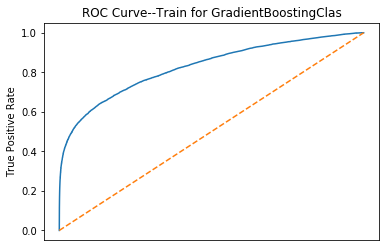

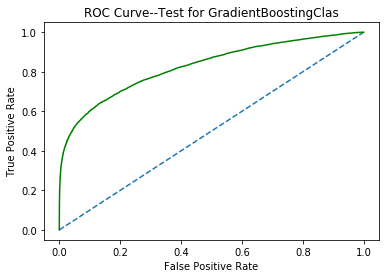

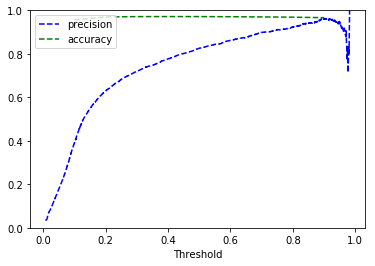

In [0]:
Machine_learning_model(GradientBoostingClassifier(),X,y)

In [0]:
final_df.dtypes

Unnamed: 0            int64
isFraud               int64
TransactionDT         int64
TransactionAmt      float64
ProductCD             int64
card1                 int64
card2               float64
card3               float64
card4                 int64
card5               float64
card6                 int64
addr1               float64
addr2               float64
dist1               float64
dist2               float64
P_emaildomain         int64
R_emaildomain         int64
C1                  float64
mean_transcation    float64
std_transcation     float64
max_transcation     float64
min_transcation     float64
id_01               float64
id_02               float64
id_03               float64
id_04               float64
id_05               float64
id_06               float64
id_07               float64
id_08               float64
                     ...   
id_11               float64
id_12                 int64
id_13               float64
id_14               float64
id_15               

Train on 413378 samples, validate on 177162 samples
Epoch 1/25
413378/413378 [==============================] - 103s 249us/step - loss: 0.1521 - binary_accuracy: 0.9635 - val_loss: 0.1486 - val_binary_accuracy: 0.9644
Epoch 2/25
413378/413378 [==============================] - 101s 245us/step - loss: 0.1444 - binary_accuracy: 0.9652 - val_loss: 0.1456 - val_binary_accuracy: 0.9644
Epoch 3/25
413378/413378 [==============================] - 102s 247us/step - loss: 0.1435 - binary_accuracy: 0.9652 - val_loss: 0.1499 - val_binary_accuracy: 0.9640
Epoch 4/25
413378/413378 [==============================] - 102s 246us/step - loss: 0.1430 - binary_accuracy: 0.9652 - val_loss: 0.1488 - val_binary_accuracy: 0.9640
Epoch 5/25
413378/413378 [==============================] - 102s 246us/step - loss: 0.1425 - binary_accuracy: 0.9652 - val_loss: 0.1454 - val_binary_accuracy: 0.9644
Epoch 6/25
413378/413378 [==============================] - 102s 247us/step - loss: 0.1425 - binary_accuracy: 0.9652 -

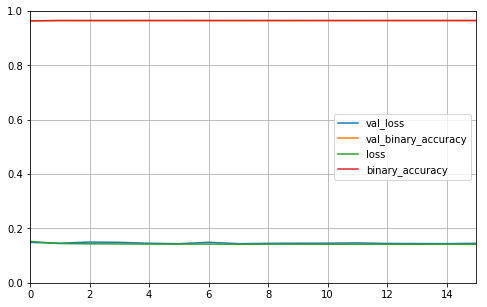

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow import keras
def oneHoty(y):
  one_hot_y=[]
  unique=list(set(y))
  for i in y:
    one_hot=np.zeros(2)
    index=unique.index(i)
    one_hot[index]=1
    one_hot_y.append(one_hot)
  return np.array(one_hot_y)
def neural_network(X,y):
    model = Sequential()
    model.add(Dense(64, input_dim=60, activation= "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(256,activation= "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64,activation= "relu"))
    model.add(BatchNormalization())
    model.add(Dense(2,activation='softmax'))
    
    y=oneHoty(y)
    xtrain, xvalid, ytrain, yvalid = train_test_split(X,y,test_size=0.3)
    
    
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
    model.compile(loss= "binary_crossentropy" , optimizer='adam', metrics=["binary_accuracy"])
    
    
    history = model.fit(xtrain,ytrain,epochs=25,validation_data=(xvalid,yvalid),callbacks=[early_stopping_cb])
    
    model.save("my_keras_model.h5")

    return history
    
history=neural_network(X,y)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
    
    
    
    